<a href="https://colab.research.google.com/github/TranQuocDuy123/TranQuocDuy123/blob/main/du_doan_goc_peta1_peta2_cua_robot_2_bac_tu_do.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as ma
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [ ]:
thi_nghiem=[]
for i in range(0,180,2):
    array=[]
    for j in range(0,200,2):
        x=50*ma.cos(ma.radians(i))+40*ma.cos(ma.radians(i+j))
        y=50*ma.sin(ma.radians(i))+40*ma.sin(ma.radians(i+j))
        array.append(np.array((i,j,x,y)))
    thi_nghiem.extend(array)

In [ ]:
header = ['alpha', 'beta', 'x', 'y']
with open('robot_2d.csv', 'w', encoding='UTF8', newline='') as bang_du_lieu:
    write = csv.writer(bang_du_lieu)
    write.writerow(header)
    write.writerows(thi_nghiem)

In [ ]:
data=pd.read_csv('robot_2d.csv')
data

,alpha,beta,x,y
0,0.0,0.0,90.000000,0.000000
1,0.0,2.0,89.975633,1.395980
2,0.0,4.0,89.902562,2.790259
3,0.0,6.0,89.780876,4.181139
4,0.0,8.0,89.610723,5.566924
...,...,...,...,...
8995,178.0,190.0,-10.358819,7.311899
8996,178.0,192.0,-10.577231,8.690902
8997,178.0,194.0,-10.843637,10.061442
8998,178.0,196.0,-11.157712,11.421851


In [ ]:
x_data=np.array(data.drop(['alpha','beta'],axis=1))
y_data=np.array(data[['alpha','beta']])
x_data.shape

(9000, 2)

In [ ]:
y_data.shape

(9000, 2)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1)
x_train.shape

(8100, 2)

In [ ]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2,  activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               384       
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dense_16 (Dense)            (None, 2)                 18        
                                                                 
Total params: 11,402
Trainable params: 11,402
Non-trai

In [ ]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
history=model.fit(x_train,y_train,batch_size=200,epochs=2000,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=30)]) 

Epoch 1/2000
33/33 [==============================] - 1s 7ms/step - loss: 11526.8076 - mean_absolute_error: 92.3496 - val_loss: 10689.0156 - val_mean_absolute_error: 86.9818
Epoch 2/2000
33/33 [==============================] - 0s 4ms/step - loss: 7908.4712 - mean_absolute_error: 71.1125 - val_loss: 6058.8320 - val_mean_absolute_error: 58.1577
Epoch 3/2000
33/33 [==============================] - 0s 4ms/step - loss: 5650.6860 - mean_absolute_error: 54.5226 - val_loss: 5647.4292 - val_mean_absolute_error: 55.4982
Epoch 4/2000
33/33 [==============================] - 0s 4ms/step - loss: 5414.6816 - mean_absolute_error: 52.7976 - val_loss: 5487.9814 - val_mean_absolute_error: 53.0168
Epoch 5/2000
33/33 [==============================] - 0s 4ms/step - loss: 5288.4526 - mean_absolute_error: 51.9033 - val_loss: 5383.0918 - val_mean_absolute_error: 52.8478
Epoch 6/2000
33/33 [==============================] - 0s 4ms/step - loss: 5192.7695 - mean_absolute_error: 51.5492 - val_loss: 5310.4536 -

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test mae:',score[1])

Test loss: 74.12317657470703
Test mae: 4.307995319366455


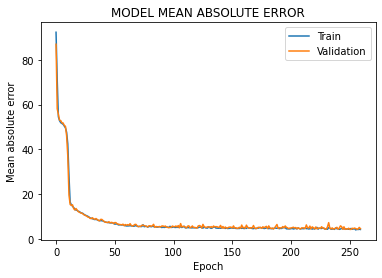

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred[89]

array([119.038826,  55.93225 ], dtype=float32)

In [ ]:
y_test[89]

array([118.,  58.])